<a href="https://colab.research.google.com/github/rod53/BrScienceSDID/blob/main/BrScienceSDID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Impact of Governmental Investment Policies in Science and Technology through the Synthetic Control Method

##Data Collection

The panel data for this work was collected at the country level, yearly from 2000 to 2021, from three different sources:

####1) World Bank Open Data
Free and open access to global development data, available on https://data.worldbank.org/. In this study the preffix "w" will refer data from this database.
####2) InCites Database - (Clarivate)
A paid-access platform, from the same group as the Web of Science (WoS), that provides access to multiple databases of reference and citation data from academic journals, conference proceedings, and other documents in various academic disciplines. Available on https://incites.clarivate.com/.
The preffix "i" will refer data from this database.
####3)  Scimago Journal & Country Rank (Elsevier)
A paid-access platform, based on the Scopus Database, that compare the scientific influence of scholarly journals based on the number and quality of their citations. Available on https://www.scimagojr.com/countryrank.php.
The preffix "s" will refer data from this database.


###Code Sheet
The code sheet with all the description of all the imported variables is available in [here](https://github.com/rod53/BrScienceSDID/blob/main/CodeSheet.xlsx).

---

##Data Preparation
_(Note to Prof. Brei: This section is in TEXT because it was done in Excel and I was not able to code it to R or Python yet. My idea is to include the code to the GitHub of the project to facilitate the replicability)_

Eventhough all data was collected at the country level, in many cases the same unit was refered with different names in each database. So, the first preparation was unify the countries list, creating a primary key to concatenate the datasets.

Then the number of missing data before any kind of data cleaning was computed to help the selection of variables and countries to be included/excluded of the analysis. For the data cleaning, first all the missing data was filled with the average of the values imediate adjacent years. Then, any country that still presenting missing data was excluded from the analysis. The comparison of the integrated database before and after cleaning is condensed in the following table, where the _green_ cells in the last column indicate the selected variables.

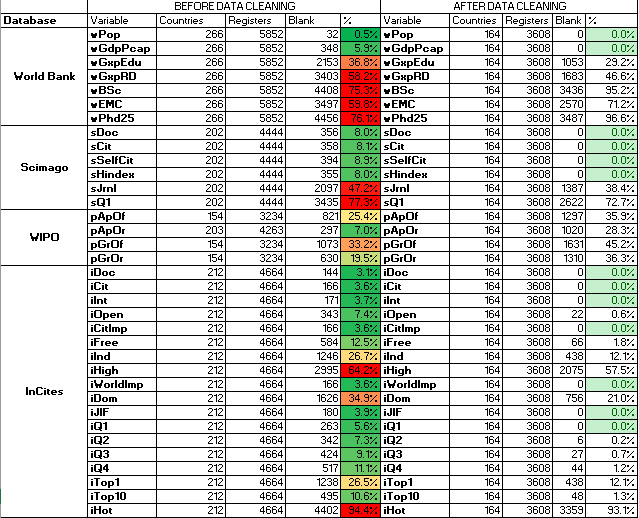

##Exploratory Analysis

For the exploratory analysis of the selected data it will be used the function _describe_ from the _psych_ package.

In [1]:
install.packages("psych")
x <- getURL("https://raw.githubusercontent.com/rod53/BrScienceSCM/main/DB.csv")
db <- read.delim(text = x, header = TRUE, sep = ";", dec = ".")
describe(db)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




ERROR: ignored

#Synthetic Diff in Diff

Robustness Check

First shots

#Bibliography
Martín-Martín, A., Thelwall, M., Orduna-Malea, E. et al. Google Scholar, Microsoft Academic, Scopus, Dimensions, Web of Science, and OpenCitations’ COCI: a multidisciplinary comparison of coverage via citations. Scientometrics 126, 871–906 (2021). https://doi.org/10.1007/s11192-020-03690-4

In [ ]:
install.packages("RCurl")
library(RCurl)
install.packages("ISLR2")
library(ISLR2)
install.packages("psych")
library(psych)
install.packages("data.table")
library("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



After that import the data from GitHub.

In [ ]:
x <- getURL("https://raw.githubusercontent.com/rod53/BrScienceSCM/main/DB.csv")
db <- read.delim(text = x, header = TRUE, sep = ";", dec = ".")

## Exploratory Analysis

Then, we use the `sum()` function to count all of the missing elements of the selected variables.

In [ ]:
names(db)
dim(db)  
sum(is.na(db$POP))
sum(is.na(db$GDPPCAP))
sum(is.na(db$DOCsjr))
sum(is.na(db$CITsjr))
sum(is.na(db$SELFCIT))
sum(is.na(db$HINDEX))
sum(is.na(db$JRNL))
sum(is.na(db$JRNLQ1))
sum(is.na(db$PAPLOF))
sum(is.na(db$PAPLOR))
sum(is.na(db$PGRTOF))
sum(is.na(db$PGRTOR))
sum(is.na(db$WosDoc))
sum(is.na(db$Cit))
sum(is.na(db$Int))
sum(is.na(db$CitImp))
sum(is.na(db$WorldImp))
sum(is.na(db$JIF))
sum(is.na(db$Q1))
sum(is.na(db$Top1))
sum(is.na(db$Hot))

[1] "No"       "Country"  "Code"     "Yr"       "POP"      "GDPPCAP" 
 [7] "GXPEDU"   "DOCsjr"   "CITsjr"   "SELFCIT"  "JRNL"     "JRNLQ1"  
[13] "PAPLOF"   "PAPLOR"   "PGRTOF"   "PGRTOR"   "WosDoc"   "Cit"     
[19] "Int"      "Open"     "CitImp"   "Free"     "Ind"      "WorldImp"
[25] "Dom"      "JIF"      "Q1"       "Q2"       "Q3"       "Q4"      
[31] "Top1"     "Top10"

[1] 3608   32

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

Here we print the data just for ilustration of how the painel was structured.

In [ ]:
db

No,Country,Code,Yr,POP,GDPPCAP,GXPEDU,DOCsjr,CITsjr,SELFCIT,⋯,Ind,WorldImp,Dom,JIF,Q1,Q2,Q3,Q4,Top1,Top10
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ALBANIA,ALB,2000,3089027,1960.882,3.43017,41,810,84,⋯,1,0.5863713,1,37,10,12,3,12,1,2
1,ALBANIA,ALB,2001,3060173,2143.526,3.45870,37,499,90,⋯,1,0.5187757,1,28,9,12,4,3,1,2
1,ALBANIA,ALB,2002,3051010,2247.497,3.11780,49,1026,90,⋯,0,0.5814848,1,54,21,16,11,6,0,5
1,ALBANIA,ALB,2003,3039616,2380.644,3.13823,51,1206,110,⋯,0,0.8270007,5,48,20,12,6,10,0,2
1,ALBANIA,ALB,2004,3026939,2522.449,3.22752,52,2022,63,⋯,0,1.6026178,2,45,20,10,8,7,1,6
1,ALBANIA,ALB,2005,3011487,2675.508,3.28155,56,1459,128,⋯,0,0.5489484,7,66,35,9,14,8,1,5
1,ALBANIA,ALB,2006,2992547,2851.367,3.19146,66,1602,79,⋯,2,0.6502474,8,76,35,15,23,3,0,7
1,ALBANIA,ALB,2007,2970017,3044.896,3.27593,80,1857,135,⋯,1,0.4797676,20,92,55,18,10,9,0,5
1,ALBANIA,ALB,2008,2947314,3298.478,0.00000,104,2506,191,⋯,2,0.4767968,14,97,50,19,18,10,1,8


Then we use de 

In [ ]:
describe(db)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No,1,3608,8.250000e+01,4.734840e+01,8.250000e+01,8.250000e+01,6.078660e+01,1.000000e+00,1.640000e+02,1.630000e+02,0.0000000,-1.20108683,7.882647e-01
Country*,2,3608,8.250000e+01,4.734840e+01,8.250000e+01,8.250000e+01,6.078660e+01,1.000000e+00,1.640000e+02,1.630000e+02,0.0000000,-1.20108683,7.882647e-01
Code*,3,3608,8.250000e+01,4.734840e+01,8.250000e+01,8.250000e+01,6.078660e+01,1.000000e+00,1.640000e+02,1.630000e+02,0.0000000,-1.20108683,7.882647e-01
Yr,4,3608,2.010500e+03,6.345168e+00,2.010500e+03,2.010500e+03,8.154300e+00,2.000000e+03,2.021000e+03,2.100000e+01,0.0000000,-1.20596383,1.056355e-01
POP,5,3608,4.138093e+07,1.462221e+08,9.130302e+06,1.598144e+07,1.151663e+07,1.760300e+04,1.412360e+09,1.412342e+09,7.7832795,64.03973531,2.434331e+06
GDPPCAP,6,3608,1.506773e+04,2.258649e+04,5.060344e+03,1.022843e+04,6.294952e+03,2.586288e+02,1.817093e+05,1.814507e+05,2.7617241,9.97383563,3.760240e+02
GXPEDU,7,3608,3.106777e+00,2.518087e+00,3.235615e+00,2.931365e+00,2.886489e+00,0.000000e+00,1.405908e+01,1.405908e+01,0.3999507,-0.08128988,4.192156e-02
DOCsjr,8,3608,1.599208e+04,5.736295e+04,7.385000e+02,4.291476e+03,1.050422e+03,2.000000e+00,8.410990e+05,8.410970e+05,7.7688829,72.96186401,9.549887e+02
CITsjr,9,3608,3.587540e+05,1.532257e+06,1.522250e+04,7.895759e+04,2.149622e+04,2.900000e+01,2.201296e+07,2.201293e+07,9.9862772,119.41520496,2.550928e+04


## Synthetic Control Method

